In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('fashion_dataset.csv')

print(df.info())
print(df.describe())

print(df.isnull().sum())

df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  36484 non-null  int64  
 1   gender              36484 non-null  object 
 2   masterCategory      36484 non-null  object 
 3   subCategory         36484 non-null  object 
 4   articleType         36484 non-null  object 
 5   baseColour          36484 non-null  object 
 6   season              36484 non-null  object 
 7   year                36484 non-null  float64
 8   usage               36484 non-null  object 
 9   productDisplayName  36484 non-null  object 
 10  filename            36484 non-null  object 
 11  link                36484 non-null  object 
 12  ratings             36484 non-null  int64  
 13  review              36484 non-null  object 
 14  Month               36484 non-null  object 
 15  Price (USD)         36484 non-null  int64  
 16  user

In [30]:
df.shape

(36484, 21)

Price Distribution by Category

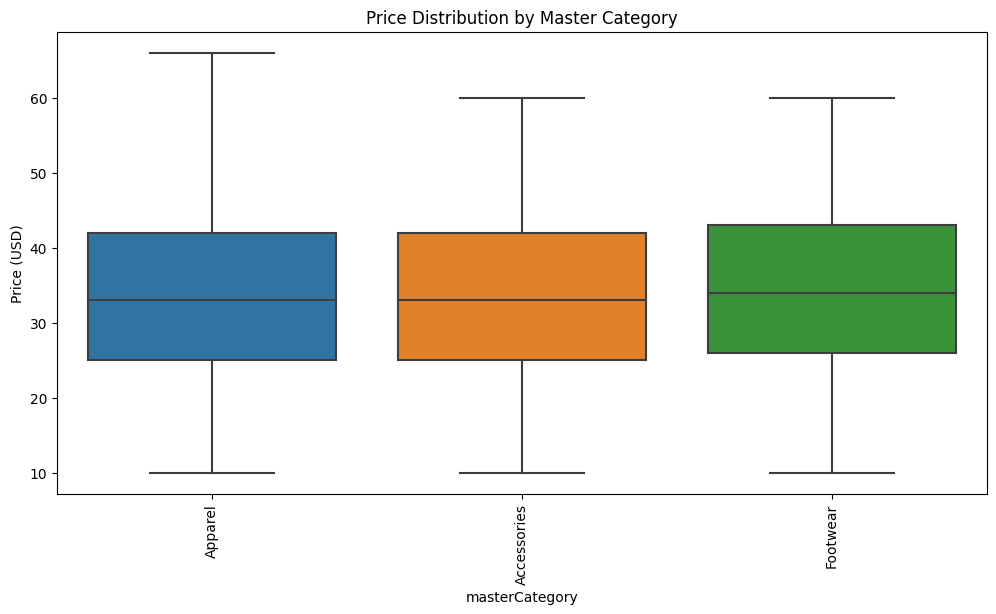

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='masterCategory', y='Price (USD)', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Master Category')
plt.show()


Count of Products by Season and Gender

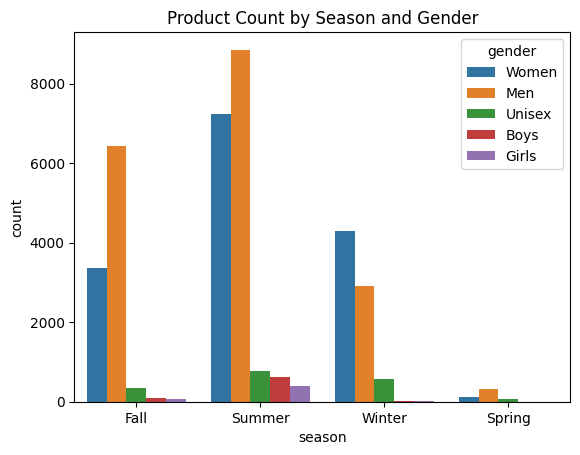

In [32]:
sns.countplot(x='season', hue='gender', data=df)
plt.title('Product Count by Season and Gender')
plt.show()


Correlation Analysis

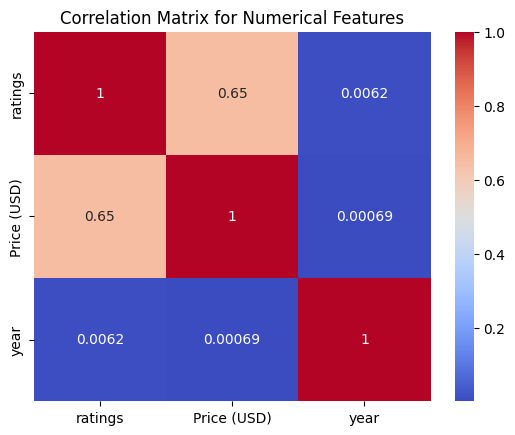

In [33]:
numerical_df = df[['ratings', 'review', 'Price (USD)', 'year']]
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


Rating and Price Analysis by Base Colour

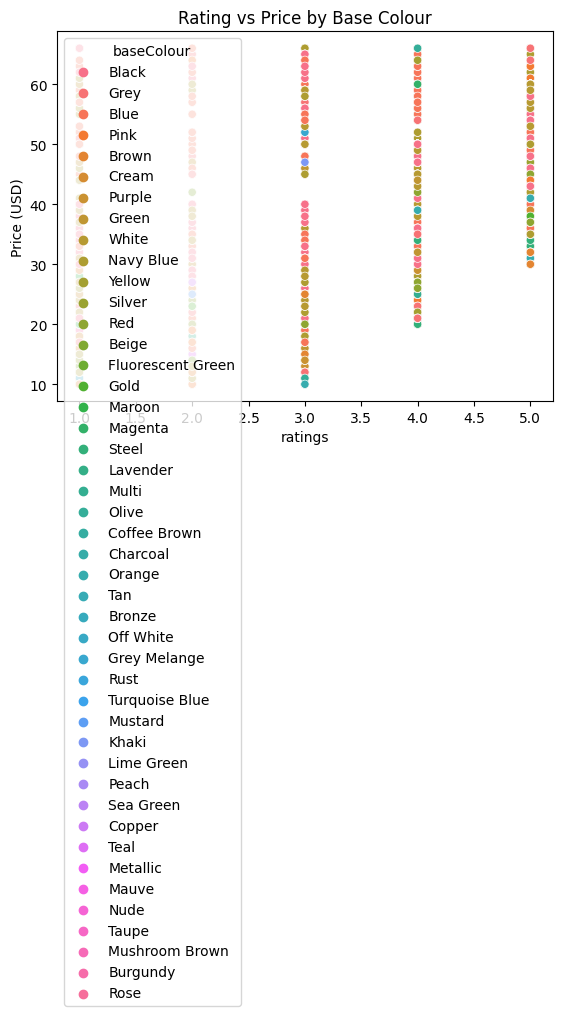

In [34]:
sns.scatterplot(data=df, x='ratings', y='Price (USD)', hue='baseColour')
plt.title('Rating vs Price by Base Colour')
plt.show()


Seasonality Analysis

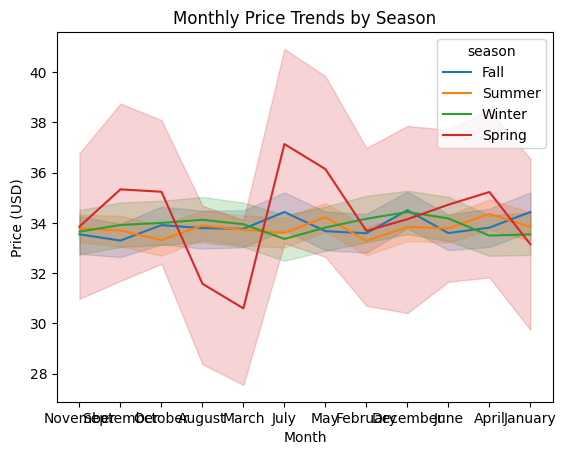

In [35]:
sns.lineplot(data=df, x='Month', y='Price (USD)', hue='season')
plt.title('Monthly Price Trends by Season')
plt.show()


In [36]:
categorical_features = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']
df_encoded = df.copy()

In [37]:
for feature in categorical_features:
    df_encoded[feature + '_encoded'] = LabelEncoder().fit_transform(df_encoded[feature].fillna('Unknown'))

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

scaler = MinMaxScaler()
df_encoded['Price (USD)'] = scaler.fit_transform(df_encoded[['Price (USD)']].fillna(df_encoded['Price (USD)'].mean()))


In [39]:
complementary_map = {
    'Topwear': ['Bottomwear', 'Shoes', 'Jewellery', 'Eyewear', 'Belts', 'Bags', 'Watches', 'Wallets'],
    'Bottomwear': ['Topwear', 'Shoes', 'Bags', 'Belts', 'Watches', 'Wallets'],
    'Bags': ['Topwear', 'Bottomwear', 'Shoes', 'Watches', 'Jewellery', 'Eyewear'],
    'Watches': ['Topwear', 'Bottomwear', 'Bags', 'Shoes', 'Jewellery'],
    'Shoes': ['Topwear', 'Bottomwear', 'Socks', 'Eyewear', 'Belts'],
    'Flip Flops': ['Topwear', 'Bottomwear', 'Socks', 'Belts', 'Eyewear'],
    'Jewellery': ['Topwear', 'Saree', 'Watches', 'Eyewear'],
    'Eyewear': ['Topwear', 'Bottomwear', 'Shoes', 'Jewellery'],
    'Belts': ['Topwear', 'Bottomwear', 'Shoes', 'Watches'],
    'Saree': ['Jewellery', 'Bags', 'Shoes'],
    'Loungewear and Nightwear': ['Bottomwear', 'Socks'],
    'Wallets': ['Topwear', 'Bottomwear', 'Bags', 'Watches'],
    'Socks': ['Shoes','Loungewear and Nightwear']
}


In [54]:
color_contrast_map = {
    'Black': ['White', 'Grey', 'Beige', 'Silver', 'Cream'],
    'Grey': ['Black', 'White', 'Red', 'Navy Blue'],
    'Blue': ['White', 'Cream', 'Yellow', 'Pink', 'Silver'],
    'Pink': ['Navy Blue', 'White', 'Beige', 'Grey'],
    'Brown': ['Cream', 'White', 'Beige', 'Olive', 'Mustard'],
    'Cream': ['Black', 'Blue', 'Brown', 'Navy Blue', 'Purple'],
    'Green': ['White', 'Black', 'Navy Blue', 'Yellow', 'Brown'],
    'White': ['Black', 'Blue', 'Red', 'Navy Blue', 'Grey'],
    'Navy Blue': ['White', 'Yellow', 'Cream', 'Pink', 'Beige'],
    'Yellow': ['Black', 'Navy Blue', 'Grey', 'Green', 'Purple'],
    'Silver': ['Black', 'Blue', 'Pink', 'Red'],
    'Red': ['White', 'Black', 'Grey', 'Beige'],
    'Beige': ['Navy Blue', 'Black', 'Red', 'Olive', 'Cream'],
    'Maroon': ['Cream', 'Beige', 'White', 'Olive'],
    'Gold': ['Black', 'White', 'Cream', 'Navy Blue'],
    'Magenta': ['White', 'Navy Blue', 'Cream'],
    'Lavender': ['Navy Blue', 'White', 'Grey'],
    'Multi': ['White', 'Black'],
    'Purple': ['Yellow', 'White', 'Cream'],
    'Charcoal': ['White', 'Cream', 'Blue'],
    'Orange': ['White', 'Black', 'Navy Blue'],
    'Tan': ['Navy Blue', 'White', 'Black'],
    'Olive': ['White', 'Yellow', 'Cream', 'Tan'],
    'Off White': ['Black', 'Grey', 'Navy Blue'],
    'Grey Melange': ['Black', 'White', 'Red', 'Blue'],
    'Rust': ['White', 'Cream', 'Beige', 'Navy Blue'],
    'Turquoise Blue': ['White', 'Black', 'Yellow'],
    'Mustard': ['White', 'Black', 'Brown', 'Navy Blue'],
    'Khaki': ['White', 'Navy Blue', 'Brown'],
    'Lime Green': ['White', 'Black', 'Grey'],
    'Peach': ['Blue', 'Black', 'Navy Blue'],
    'Sea Green': ['White', 'Black', 'Navy Blue'],
    'Teal': ['White', 'Cream', 'Navy Blue'],
    'Mauve': ['White', 'Grey', 'Blue'],
    'Copper': ['White', 'Black', 'Navy Blue'],
    'Steel': ['Black', 'White', 'Beige'],
    'Bronze': ['White', 'Black'],
    'Nude': ['White', 'Black', 'Beige'],
    'Metallic': ['White', 'Black', 'Silver'],
    'Taupe': ['White', 'Black', 'Beige'],
    'Fluorescent Green': ['White', 'Black'],
    'Burgundy': ['White', 'Beige', 'Grey'],
    'Mushroom Brown': ['White', 'Grey', 'Black'],
    'Coffee Brown': ['White', 'Beige', 'Cream']
}

In [57]:
def recommend_complementary_for_user(user_id, df, complementary_map, color_contrast_map, num_recommendations=5):
    # Find items that the user has interacted with
    user_items = df[df['user_id'] == user_id]
    
    recommendations = pd.DataFrame()
    for _, item in user_items.iterrows():
        item_subcategory = item['subCategory']
        item_color = item['baseColour']
    complementary_subcategories = complementary_map.get(item_subcategory, [])
    color_contrast_list = color_contrast_map.get(item_color, [])
    complementary_items = df[
            (df['subCategory'].isin(complementary_subcategories)) &
            (df['baseColour'].isin(color_contrast_list))
        ]
    complementary_subcategories = complementary_map.get(item_subcategory, [])

In [ ]:
# # Check if there are any columns with all NaN values
# print("Columns with all NaN values:")
# print(df_encoded[['ratings', 'review', 'Price (USD)']].isna().all())

# # Optionally, replace all-NaN columns with a default value (e.g., 0) or drop them
# df_encoded['ratings'].fillna(0, inplace=True)
# df_encoded['review'].fillna(0, inplace=True)
# df_encoded['Price (USD)'].fillna(0, inplace=True)

# # Re-apply MinMaxScaler
# scaler = MinMaxScaler()
# df_encoded[['ratings', 'review', 'Price (USD)']] = scaler.fit_transform(df_encoded[['ratings', 'review', 'Price (USD)']])


Columns with all NaN values:
ratings        False
review         False
Price (USD)    False
dtype: bool


NameError: name 'MinMaxScaler' is not defined

In [ ]:
# Drop columns with all NaN values
df_encoded = df_encoded.drop(columns=['review'])

# Apply MinMaxScaler on the remaining numeric columns
scaler = MinMaxScaler()
df_encoded[['ratings', 'Price (USD)']] = scaler.fit_transform(df_encoded[['ratings', 'Price (USD)']])


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Select feature columns for content-based filtering
feature_columns = ['masterCategory_encoded', 'subCategory_encoded', 'articleType_encoded', 
                   'gender_encoded', 'baseColour_encoded', 'season_encoded', 'usage_encoded', 'Price (USD)']
item_features = df_encoded[feature_columns]
item_similarity = cosine_similarity(item_features)


In [ ]:
def get_recommendations(item_id, similarity_matrix, df, top_n=5):
    item_idx = df[df['id'] == item_id].index[0]
    similarity_scores = list(enumerate(similarity_matrix[item_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    top_items = [df.iloc[i[0]]['id'] for i in similarity_scores[1:top_n+1]]
    return top_items




In [ ]:
item_id = 8493  # Replace with a valid item ID from your dataset
recommendations = get_recommendations(item_id, item_similarity, df)
print("Recommended Items:", recommendations)

Recommended Items: [12839, 10366, 59881, 59880, 59878]


In [ ]:
recommended_product_ids = [12839, 10366, 59881, 59880, 59878]
recommended_products = df[df['id'].isin(recommended_product_ids)]
print(recommended_products)

       user_id     id gender masterCategory subCategory articleType  \
10764    79397  59881  Women        Apparel  Bottomwear   Stockings   
14794    96799  12839  Women        Apparel  Bottomwear      Skirts   
28691    81058  59880  Women        Apparel  Bottomwear   Stockings   
29457    62028  59878  Women        Apparel  Bottomwear   Stockings   
36052    71348  10366  Women        Apparel  Bottomwear      Skirts   

      baseColour season    year   usage  ...  \
10764      Black   Fall  2012.0  Casual  ...   
14794      Black   Fall  2011.0  Casual  ...   
28691      Black   Fall  2012.0  Casual  ...   
29457      Black   Fall  2012.0  Casual  ...   
36052      Black   Fall  2011.0  Casual  ...   

                                                  review  Month Price (USD)  \
10764  High quality fabric, very satisfied. for every...   July          48   
14794  Amazing quality! Definitely recommend. but cou...  April          39   
28691  Exceeded expectations, love the fit! esp